In [1]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState, ConversionObservation


data_1 = pd.read_csv('data/prices_round_2_day_-1.csv', sep =";")
data_2 = pd.read_csv('data/prices_round_2_day_0.csv', sep =";")
data_3 = pd.read_csv('data/prices_round_2_day_1.csv', sep =";")

data=[data_1, data_2, data_3]
data= pd.concat(data).reset_index(drop=True)
data.head()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1


In [8]:
data_5 = pd.read_csv("data/prices_round_3.csv", sep=";")
#get only the rows containing product = ORCHIDS and reset the index
data_5 = data_5[data_5['product'] == 'ORCHIDS'].reset_index(drop=True)
data_5

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,ORCHIDS,1053,7,1052.0,2.0,1046.0,46.0,1059,7,1060.0,2.0,1067.0,46.0,1056.0,0.000000
1,2,100,ORCHIDS,1051,8,1050.0,2.0,1045.0,46.0,1058,8,1059.0,2.0,1065.0,46.0,1054.5,0.000000
2,2,200,ORCHIDS,1051,7,1050.0,4.0,1045.0,41.0,1058,7,1059.0,4.0,1065.0,41.0,1054.5,0.000000
3,2,300,ORCHIDS,1052,8,1051.0,3.0,1045.0,47.0,1059,8,1060.0,3.0,1066.0,47.0,1055.5,0.000000
4,2,400,ORCHIDS,1053,9,1052.0,5.0,1046.0,58.0,1060,9,1061.0,5.0,1067.0,58.0,1056.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,99500,ORCHIDS,1044,9,1043.0,2.0,1037.0,50.0,1052,9,1053.0,2.0,1059.0,50.0,1048.0,-486.599609
996,2,99600,ORCHIDS,1048,8,1047.0,3.0,1041.0,48.0,1055,8,1056.0,3.0,1062.0,48.0,1051.5,-486.599609
997,2,99700,ORCHIDS,1048,10,1047.0,5.0,1041.0,56.0,1055,10,1056.0,5.0,1062.0,56.0,1051.5,-486.599609
998,2,99800,ORCHIDS,1048,9,1047.0,2.0,1041.0,50.0,1055,9,1056.0,2.0,1062.0,50.0,1051.5,-486.599609


In [13]:
data_6 = pd.read_csv("data/prices_round_4.csv", sep=";")
#get only the rows containing product = ORCHIDS and reset the index
data_6 = data_6[data_6['product'] == 'ORCHIDS'].reset_index(drop=True)
data_6

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,ORCHIDS,1090,8,1089.0,5.0,1082.0,49.0,1099,8,1100.0,5.0,1108.0,49.0,1094.5,0.0
1,3,100,ORCHIDS,1091,10,1090.0,2.0,1083.0,53.0,1099,10,1100.0,2.0,1107.0,53.0,1095.0,0.0
2,3,200,ORCHIDS,1090,5,1089.0,5.0,1082.0,41.0,1094,6,1098.0,5.0,1099.0,5.0,1092.0,0.0
3,3,300,ORCHIDS,1090,6,1089.0,4.0,1082.0,45.0,1098,6,1099.0,4.0,1106.0,45.0,1094.0,0.0
4,3,400,ORCHIDS,1090,10,1089.0,3.0,1082.0,56.0,1098,10,1099.0,3.0,1106.0,56.0,1094.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,99500,ORCHIDS,1052,9,1050.0,5.0,1041.0,47.0,1062,9,1063.0,5.0,1073.0,47.0,1057.0,0.0
996,3,99600,ORCHIDS,1053,9,1051.0,5.0,1042.0,50.0,1063,9,1064.0,5.0,1074.0,50.0,1058.0,0.0
997,3,99700,ORCHIDS,1053,9,1051.0,2.0,1042.0,55.0,1063,9,1064.0,2.0,1074.0,55.0,1058.0,0.0
998,3,99800,ORCHIDS,1052,9,1050.0,2.0,1041.0,45.0,1062,9,1063.0,2.0,1073.0,45.0,1057.0,0.0


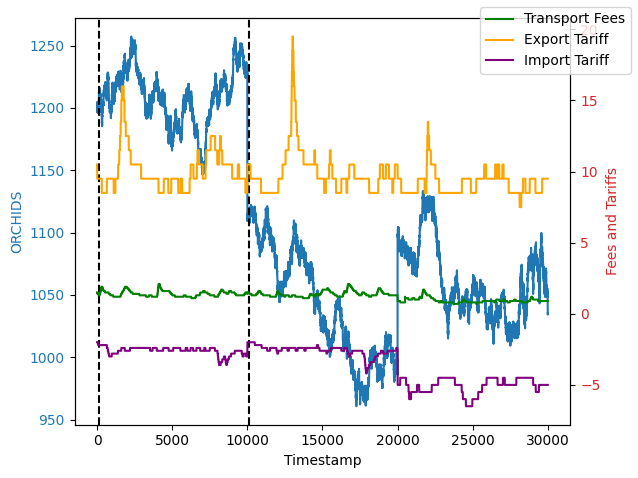

In [2]:
# Plotting
fig, ax1 = plt.subplots()

# Plotting ORCHIDS
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS', color=color)
ax1.plot(data['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating second y-axis for TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Fees and Tariffs', color=color)

# Plotting TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2.plot(data['TRANSPORT_FEES'], color='green', label='Transport Fees')
ax2.plot(data['EXPORT_TARIFF'], color='orange', label='Export Tariff')
ax2.plot(data['IMPORT_TARIFF'], color='purple', label='Import Tariff')

ax2.tick_params(axis='y', labelcolor=color)

#add vertical line at 100
ax1.axvline(x=100, color='black', linestyle='--')
ax1.axvline(x=100 + 100*100, color='black', linestyle='--')


# Adding legend
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

In [3]:
# scale data['TRANSPORT_FEES'] from -1 to 1
scaled_TF = (data['TRANSPORT_FEES'] - data['TRANSPORT_FEES'].min()) / (data['TRANSPORT_FEES'].max() - data['TRANSPORT_FEES'].min()) * 2 - 1
scaled_ET = (data['EXPORT_TARIFF'] - data['EXPORT_TARIFF'].min()) / (data['EXPORT_TARIFF'].max() - data['EXPORT_TARIFF'].min()) * 2 - 1
scaled_IT = (data['IMPORT_TARIFF'] - data['IMPORT_TARIFF'].min()) / (data['IMPORT_TARIFF'].max() - data['IMPORT_TARIFF'].min()) * 2 - 1

In [4]:
cost = scaled_TF + scaled_IT + scaled_ET

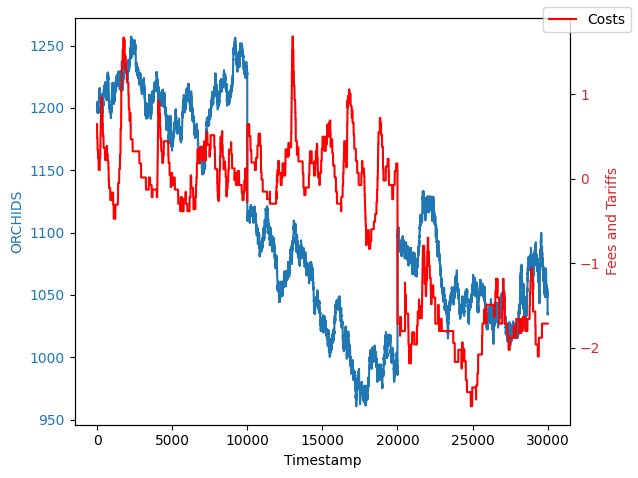

In [5]:
# Plotting
fig, ax1 = plt.subplots()

# Plotting ORCHIDS
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS', color=color)
ax1.plot(data['ORCHIDS'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating second y-axis for TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Fees and Tariffs', color=color)

# Plotting TRANSPORT_FEES, EXPORT_TARIFF, and IMPORT_TARIFF
ax2.plot(cost, color='red', label='Costs')


ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

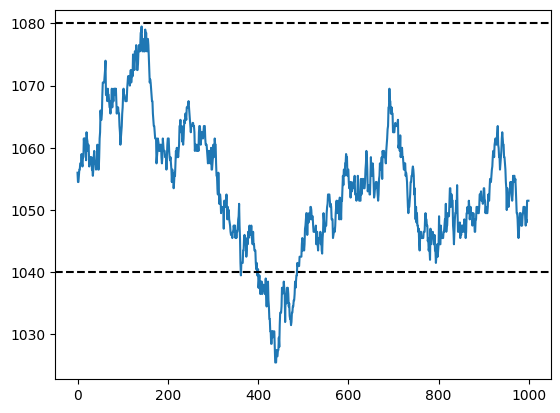

In [15]:
data_5['mid_price'].plot()
#plot horizontal line at 1080 and 1040
plt.axhline(y=1080, color='black', linestyle='--')
plt.axhline(y=1040, color='black', linestyle='--')

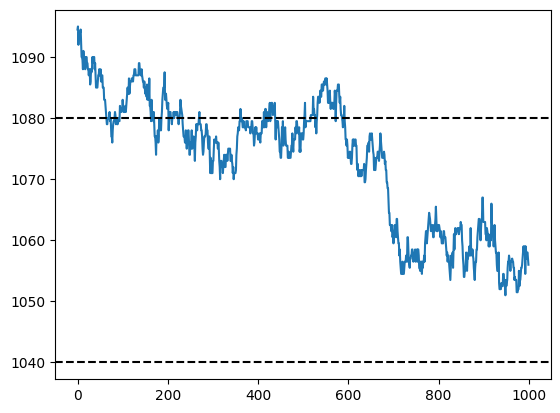

In [16]:
data_6['mid_price'].plot()
plt.axhline(y=1080, color='black', linestyle='--')
plt.axhline(y=1040, color='black', linestyle='--')